In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_dataset =load_iris()

In [4]:
print('Keys of iris datasets: \n{}'.format(iris_dataset.keys()))

Keys of iris datasets: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

We want to : match features to name

In [6]:
print('target names: {}'.format(iris_dataset['target_names']))

target names: ['setosa' 'versicolor' 'virginica']


We have a sets of features and we want to match our features to name. Our steps are:
1. We get the features name to see what our inputs are
2. Understand the shape of the array
3. Understand the encoding of our target_names
4. Split the data we have to tests data and training data
5. Analyse the data that we have
6. Build models 
7. Evaluates the models

### __Step 1__: getting feature names

In [7]:
print('features name: \n{}'.format(iris_dataset['feature_names']))

features name: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### __Step 2__: looking at the shapes of data

In [8]:
iris_dataset['data'].shape

(150, 4)

The data has 150 flowers, each of which has 4 features as above

### __Step3__: Understand target encoding on targets

In [13]:
# type of target
print('target type: {}'.format(type(iris_dataset['target'])))
# shape of target
print('target shape: {}'.format(iris_dataset['target'].shape))
# vaulues in the target
print('target values: \n {}'.format(iris_dataset['target']))

target type: <class 'numpy.ndarray'>
target shape: (150,)
target values: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


What we are looking at is each of the `target_names` are assigned. [setosa, versicolor, virginica] are assigned as [0 , 1, 2] respectively 

### __Step 4__: split the data into `test_data` and `train_data`

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [16]:
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [17]:
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


### __Step 5__: analyse our data with pairwise plot

In [18]:
# split the features into corresponding scatter plot
# Create dataframe from X_train
# label the columns using strings in the features_names strings
# create a scatter plot matrix from he data frame, coloring using y_train

import pandas as pd

iris_train_df = pd.DataFrame(X_train,columns= iris_dataset['feature_names'])
print(iris_train_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.9               3.0                4.2               1.5
1                  5.8               2.6                4.0               1.2
2                  6.8               3.0                5.5               2.1
3                  4.7               3.2                1.3               0.2
4                  6.9               3.1                5.1               2.3
..                 ...               ...                ...               ...
107                4.9               3.1                1.5               0.1
108                6.3               2.9                5.6               1.8
109                5.8               2.7                4.1               1.0
110                7.7               3.8                6.7               2.2
111                4.6               3.2                1.4               0.2

[112 rows x 4 columns]


c:\Users\0010007\worklab\machine_learning\py\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:96: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


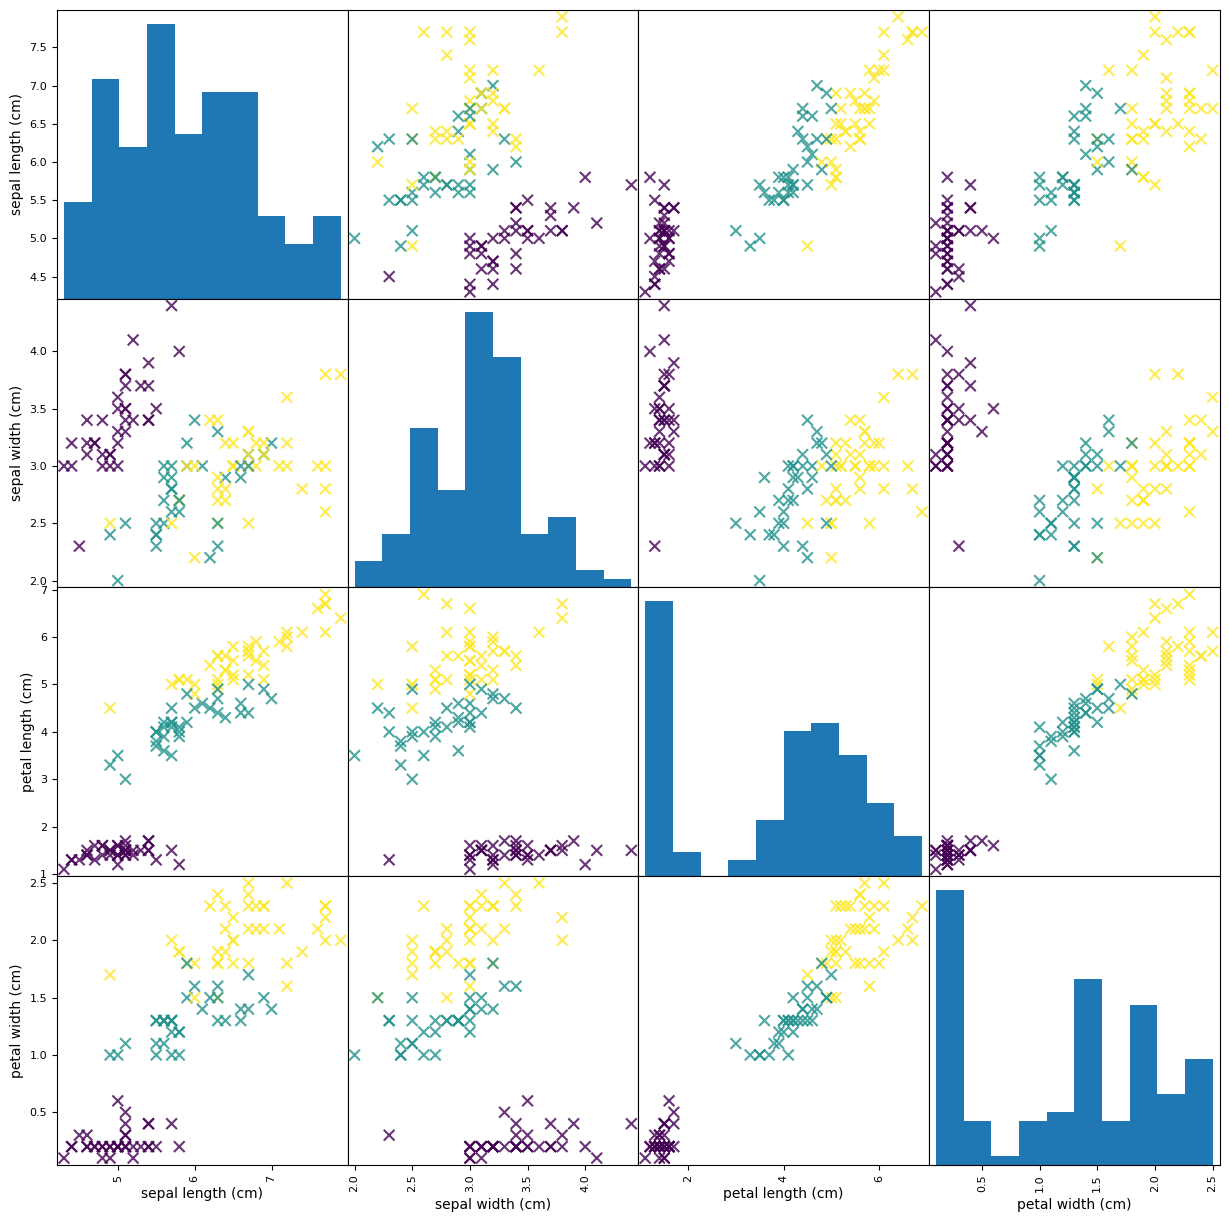

In [26]:
f_crr = pd.plotting.scatter_matrix(iris_train_df, c=y_train, figsize=(15,15), marker='x',
                                   hist_kwds={'bins':10}, s=60, alpha=0.8)

Each target flowers has their features quite separated. Which means these features are not related to each other and these can considered as attributes for the flowers. As inputs data are well organzed, we can use this as our training data

### __Step 6__: build models
here we will build a model using KNN (k-nearest neighbour) which is a closest neighbour of a datapoint.
In scikit learn, machine learning models are implemented in their own casses called `Estimator` classes. The KNN algorithm is implemented in the `KNeighborClassifier` class, which is part of `neighbors` module.
We will instantiate the class as an object, set parameters of the models. Here we will set the number of neighbors for us to check is 1

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [28]:
# call the fit method to train the model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

### __Step7__: models evaluation

In [32]:
# making prediction
# Hypothesiscally, we found a flower with the following feature
import numpy as np
new_flower = np.array([[5,2.9,1,0.2]])

In [33]:
prediction = knn.predict(new_flower)
print('prediction: {}'.format(prediction))
print('name of the flower: {}'.format(iris_dataset['target_names'][prediction]))

prediction: [0]
name of the flower: ['setosa']


Note that we use Numpy array syntax making the flower as an entry in 2-dimensional data. Scikit learn always expect 2 dimensional data

Now we evaluating the model using the test data

In [34]:
y_pred = knn.predict(X_test)

print('test prediction: \n {}'.format(y_pred))

test prediction: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [38]:
# check how close the prediction is 
score = np.mean(y_pred == y_test)
print('score of the model is: {:.3f}'.format(score))

score of the model is: 0.974


With that score, we are about 97% correct when we making a prediction. But remember, data can lies. The prediction can only be good if the input data quality is good.